Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


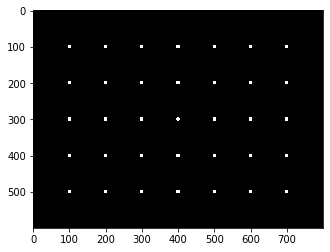

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')


image = cv.imread('/content/gdrive/My Drive/checkerboard.png',cv.IMREAD_COLOR)
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

# Calculate Ix,Iy using sobel filters
sobel_x = cv.Sobel(gray_image,cv.CV_32F,1,0,ksize=3)
sobel_y = cv.Sobel(gray_image,cv.CV_32F,0,1,ksize=3)

IxIx = sobel_x * sobel_x
IxIy = sobel_x * sobel_y
IyIy = sobel_y * sobel_y

height,width = gray_image.shape[:]
window_size = 3
offset = window_size // 2
H = np.zeros((2,2))
result = np.zeros(gray_image.shape)

# Calculate a min eigenvalue of H in all pixels except boundaries
for y in range(offset,height-offset):
  for x in range(offset,width-offset):
    M_1 = IxIx[y-offset:y+offset+1,x-offset:x+offset+1]
    M_2 = IxIy[y-offset:y+offset+1,x-offset:x+offset+1]
    M_3 = IyIy[y-offset:y+offset+1,x-offset:x+offset+1]
    e1 = M_1.sum()
    e2 = M_2.sum()
    e3 = M_3.sum()
    H = np.array([[e1,e2], [e2,e3]])
    w, v = np.linalg.eig(H)
    result[y,x] = min(w)

plt.imshow(result, cmap='gray', vmin=0, vmax=255)
plt.show()



    
